In [6]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop


In [7]:
import src.sysid_util as sid
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import scipy as sp
import control as ct
from src.file_loader import load_excel


TIME_COLUMN_NAME = 'Time (HH:mm:ss.SSS)'

In [8]:
# def load_excel(file_name):
#     """
#     Load an Excel file from the 'Flow Battery Project' data folder.

#     This function constructs the full file path to an Excel file located in the 
#     'Flow Battery Project' data folder and loads it into a pandas ExcelFile object.

#     Parameters:
#     file_name (str): Name of the Excel file to load.

#     Returns:
#     pd.ExcelFile: The loaded Excel file.
#     """
#     # Get the absolute path of the project's root directory
#     project_root = os.path.dirname(os.path.dirname(__file__))
    
#     # Construct the path to the data folder
#     data_folder = os.path.join(project_root, 'Flow Battery Project', 'data')
    
#     # Construct the full file path
#     file_path = os.path.join(data_folder, file_name)
    
#     # Load the Excel file
#     xls = pd.ExcelFile(file_path)
    
#     return xls

In [9]:
def identify_charging_cycles(data, time_col, value_col):
    # Initialize variables

    cycle = []
   
    # Iterate through the data to identify charging cycles
    for i in range(len(data)):
        current_value = data[value_col].iloc[i]
        current_time = data[time_col].iloc[i]
        if current_time < 0.25:
            cycle.append((current_time, current_value))

    return cycle


In [ ]:
def find_charging_cycles(df):
    cycles = []
    current_cycle = []
    i = 0
    while i < len(df):
        control_value = df.loc[i, 'control/mA']
        if control_value > 0:
            # Find the start of the cycle (including 10 points from the previous negative part)
            start = max(0, i-10)
            jj = start
            while jj < i:
                current_cycle.append(df.iloc[jj])
                jj+=1
            while i < len(df) and df.loc[i, 'control/mA'] > 0:
                current_cycle.append(df.iloc[i])
                i += 1
            # End of the cycle, add it to cycles list
            cycles.append(pd.DataFrame(current_cycle))
            current_cycle = []
        else:
            i += 1
    return cycles

In [10]:
file_path = 'chronopotentiometry For CNF Paper.xlsx'
xls = load_excel(file_path)

# Load the first sheet into a DataFrame
first_sheet_df = xls.parse(xls.sheet_names[0], header=1)
first_sheet_df = first_sheet_df[['time/hours', 'Ewe/mV.4']]


time_col = 'time/hours'
value_col = 'Ewe/mV.4'

charging_cycles = identify_charging_cycles(first_sheet_df, time_col, value_col)
tt, yy = list(zip(*charging_cycles))
# Inspect the contents of yy
print("yy:", yy)
# Inspect the contents of yy
print("tt:", tt)
uu = np.ones(len(yy))

uu = np.concatenate((np.zeros(10),uu))
yy = np.concatenate((yy[0]*np.ones(10),yy)) 
yy = yy - yy[0]*np.ones(len(yy))


yy: (np.float64(-4.6249899999999995), np.float64(0.19066999999999998), np.float64(1.79441), np.float64(3.13086), np.float64(3.9709100000000004), np.float64(5.020980000000001), np.float64(5.784669999999999), np.float64(6.35743), np.float64(7.1020199999999996), np.float64(7.61751), np.float64(8.09482), np.float64(8.457569999999999), np.float64(8.610299999999999), np.float64(9.22125), np.float64(9.56491), np.float64(9.64128), np.float64(9.908570000000001), np.float64(10.1949), np.float64(10.5386), np.float64(10.6913), np.float64(10.8059), np.float64(11.1114), np.float64(11.1305), np.float64(11.245), np.float64(11.5505), np.float64(11.588700000000001), np.float64(11.7605), np.float64(11.7605), np.float64(11.8178), np.float64(11.894200000000001), np.float64(12.1423), np.float64(12.276), np.float64(12.1996), np.float64(12.428700000000001), np.float64(12.3524), np.float64(12.4478), np.float64(12.5815), np.float64(12.428700000000001), np.float64(12.6769), np.float64(12.486), np.float64(12.6769

In [11]:
charging_cycles

[(np.float64(0.0), np.float64(-4.6249899999999995)),
 (np.float64(0.005555555555555556), np.float64(0.19066999999999998)),
 (np.float64(0.011111111111111112), np.float64(1.79441)),
 (np.float64(0.016666666666666666), np.float64(3.13086)),
 (np.float64(0.022222222222222223), np.float64(3.9709100000000004)),
 (np.float64(0.027777777777777776), np.float64(5.020980000000001)),
 (np.float64(0.03333333333333333), np.float64(5.784669999999999)),
 (np.float64(0.03888888888888889), np.float64(6.35743)),
 (np.float64(0.044444444444444446), np.float64(7.1020199999999996)),
 (np.float64(0.05), np.float64(7.61751)),
 (np.float64(0.05555555555555555), np.float64(8.09482)),
 (np.float64(0.06111111111111111), np.float64(8.457569999999999)),
 (np.float64(0.06666666666666667), np.float64(8.610299999999999)),
 (np.float64(0.07222222222222222), np.float64(9.22125)),
 (np.float64(0.07777777777777778), np.float64(9.56491)),
 (np.float64(0.08333333333333333), np.float64(9.64128)),
 (np.float64(0.088888888888

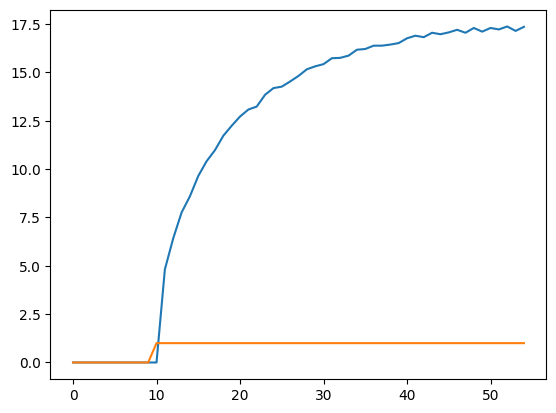

In [59]:
fig,ax = plt.subplots(1)
ax.plot(yy)
ax.plot(uu)

In [109]:
nf = 2
nb = 2
nc = 0
nd = 0
na = nf
nk = 1
   
n_arx = [nf, nb, nk]
theta_arx = sid.V_arx_lin_reg(n_arx,yy,uu)

theta_box_jenkins = np.concatenate((theta_arx[n_arx[0]:np.sum(n_arx)],np.zeros(nc+nd),theta_arx[0:n_arx[0]])) 
n_bj = [nb, nc, nd, nf, nk]

optimization_results = sp.optimize.least_squares(sid.V_box_jenkins, theta_box_jenkins, jac=sid.jac_V_bj, args=(n_bj,yy,uu))

In [110]:
print(optimization_results)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 0.000e+00  0.000e+00 ... -1.248e-01  6.491e-02]
           x: [ 4.647e+00 -3.523e+00 -1.190e+00  2.542e-01]
        cost: 0.2986286595705183
         jac: [[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
               [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
               ...
               [-1.528e+01 -1.525e+01  2.518e+02  2.502e+02]
               [-1.530e+01 -1.528e+01  2.533e+02  2.518e+02]]
        grad: [-6.639e-09 -6.082e-09  1.494e-04  9.522e-05]
  optimality: 0.00014944816563797214
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 9
        njev: 9


<TransferFunction>: sys[5470]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   4.647 z^2 - 3.523 z
-------------------------
z^3 - 1.19 z^2 + 0.2542 z

dt = 0.005

[0.75809979+0.j 0.        +0.j]
[0.91091209+0.j 0.27903684+0.j 0.        +0.j]


Text(0, 0.5, 'Voltage')

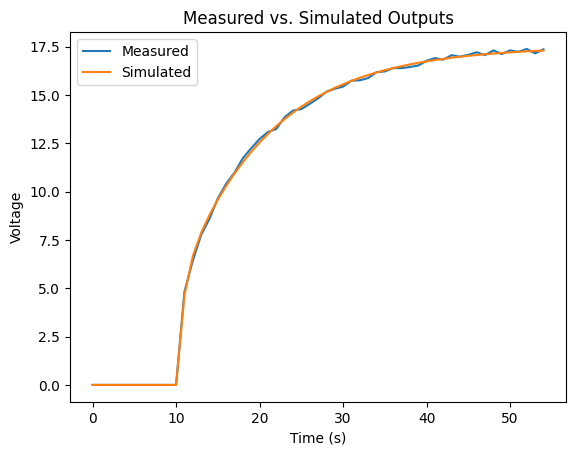

In [111]:
Ts = 0.005
G_hat_box_jenkins,H_hat_box_jenkins=sid.theta_2_tf_box_jenkins(optimization_results.x,n_bj,Ts)

print(G_hat_box_jenkins)

print(G_hat_box_jenkins.zeros())
print(G_hat_box_jenkins.poles())

tt, y_sim = ct.forced_response(G_hat_box_jenkins,U=uu)
fig,ax = plt.subplots(1)
ax.plot(yy,label='Measured')
ax.plot(y_sim,label='Simulated')
ax.legend()
ax.set_title('Measured vs. Simulated Outputs')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage')

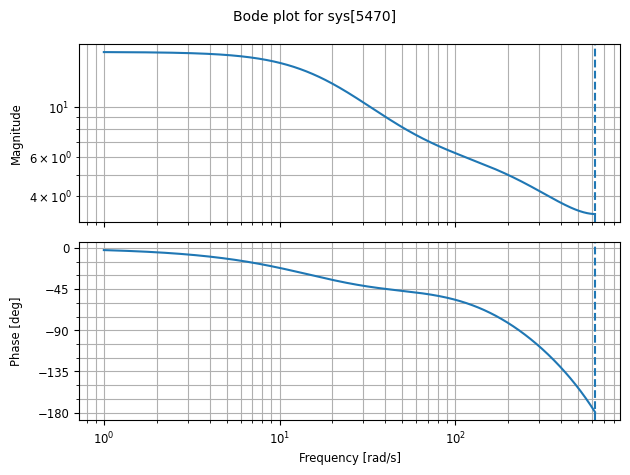

In [112]:
out=ct.bode_plot(G_hat_box_jenkins)

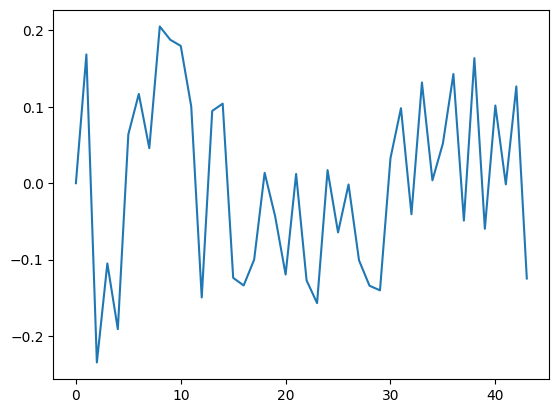

In [113]:
t0 = 10
epsilon = yy[t0:-1] - y_sim[t0:-1]
fig,ax = plt.subplots(1)
ax.plot(epsilon)


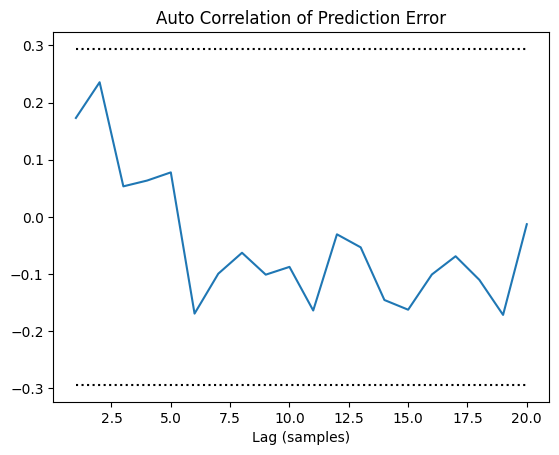

In [114]:
sid.auto_correlation_test(epsilon,tau=20)